In [2]:
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import numpy as np
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\ali\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ali\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ali\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ali\anaconda3\

In [3]:
catImg = cv2.imread('../Image processing/CATS_DOGS/train/CAT/1.jpg')
catImg = cv2.cvtColor(catImg,cv2.COLOR_BGR2RGB)

In [4]:
dogImg = cv2.imread('../Image processing/CATS_DOGS/train/Dog/2.jpg')
dogImg = cv2.cvtColor(dogImg,cv2.COLOR_BGR2RGB)

In [5]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

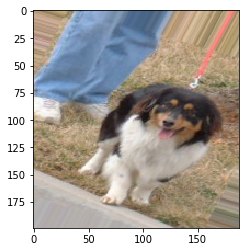

In [6]:
plt.imshow(image_gen.random_transform(dogImg))

In [7]:
# image_gen.flow_from_directory('../Image processing/CATS_DOGS/train')
# image_gen.flow_from_directory('../Image processing/CATS_DOGS/test')

In [12]:
image_shape = (150,150,3) #WHC

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))



model.add(Dropout(0.5))  # reduce overfitting by Dropouts 50%

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
#model.summary()

In [15]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../Image processing/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [16]:
test_image_gen = image_gen.flow_from_directory('../Image processing/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [17]:
#train_image_gen.class_indices

In [18]:
results = model.fit_generator(train_image_gen,epochs=1,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/1
150/150 [==============================] - 78s 518ms/step - loss: 0.6944 - acc: 0.5371 - val_loss: 0.6769 - val_acc: 0.5938


In [19]:
results.history['acc']

[0.5370833333333334]

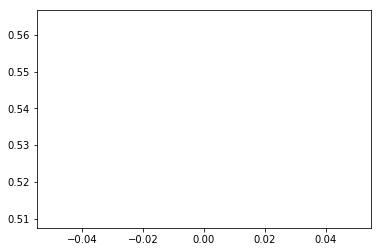

In [20]:
plt.plot(results.history['acc'])

Identify the image

In [23]:
dog_file = '../Image processing/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

#dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

FileNotFoundError: [Errno 2] No such file or directory: '../DATA/CATS_DOGS/train/Dog/2.jpg'

In [22]:
prediction_prob = model.predict(dog_img)

ValueError: Error when checking input: expected conv2d_4_input to have 4 dimensions, but got array with shape (150, 150, 3)

In [ ]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')